In [262]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

"С вашим датасетом нужно проделать примерно то же самое, что мы делали (сделаем) на лекции.  Все должно бть выложено на ваш гиты
А именно:

0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы"

In [389]:
path1="C:\\Users\\vikto\\Downloads\\dataset_diabetes\\dataset_diabetes\\diabetic_data.csv"
Y = pd.read_csv(path1 )
Y.head(10)#Output our data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [390]:
Y.tail(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
101757,443842136,181593374,Caucasian,Female,[70-80),?,1,1,7,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101758,443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101759,443842778,86472243,Caucasian,Male,[80-90),?,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101760,443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [391]:
Y.info()
#Y.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Описание датасета "Diabetes 130-US hospitals for years 1999-2008 Data Set"
### Общее описание.
   База данных представляет собой выдержку, отражающую 10 лет (1999–2008 гг.) клинической помощи в 130 больницах и интегрированных сетях доставки на всей территории Соединенных Штатов: Средний Запад (18 больниц), Северо-Восток (58), Юг (28) и Запад. (16). База данных содержит данные, систематически собираемые из электронных медицинских карт участвующих учреждений. Он включает более 50 атрибутами, представляющих информацию о пациенте, его болезни,  и результат лечения. Информация была извлечена из базы данных, которые удовлетворяли следующим критериям:
* Это стационарная встреча (госпитализация).
* Это встреча с диабетом, то есть такая, во время которой любой вид диабета был введен в систему в качестве диагноза.
* Продолжительность пребывания составляла не менее 1 дня и не более 14 дней.
* Лабораторные тесты проводились во время столкновения.
* Лекарства вводили во время встречи.



 **Encounter ID**:	Numeric	Unique identifier of an encounter (Пропущенные значения: 0%).  
**Patient number**:	Numeric	Unique identifier of a patient	(Пропущенные значения: 0%).   
**Race**	Nominal	Values: Caucasian, Asian, African American, Hispanic, and other	(Пропущенные значения: 2%).  
**Gender**	Nominal	Values: male, female, and unknown/invalid	(Пропущенные значения: 0%).  
**Age**	Nominal	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)	(Пропущенные значения: 0%)  
**Weight**	Numeric	Weight in pounds.	(Пропущенные значения: 97%)  
**Admission type**	Nominal	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available	(Пропущенные значения: 0%)  
**Discharge disposition**	Nominal	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available	(Пропущенные значения: 0%).  
**Admission source**	Nominal	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital	(Пропущенные значения: 0%).  
**Time in hospital**	Numeric	Integer number of days between admission and discharge	(Пропущенные значения: 0%).  
**Payer code**	Nominal	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay	(Пропущенные значения: 52%).    
**Medical specialty**	Nominal	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon	(Пропущенные значения: 53%).  
**Number of lab procedures**	Numeric	Number of lab tests performed during the encounter	(Пропущенные значения: 0%).  
**Number of procedures**	Numeric	Number of procedures (other than lab tests) performed during the encounter	(Пропущенные значения: 0%).  
**Number of medications**	Numeric	Number of distinct generic names administered during the encounter	(Пропущенные значения: 0%).  
**Number of outpatient visits**	Numeric	Number of outpatient visits of the patient in the year preceding the encounter	(Пропущенные значения: 0%).  
**Number of emergency visits**	Numeric	Number of emergency visits of the patient in the year preceding the encounter	(Пропущенные значения: 0%).  
**Number of inpatient visits**	Numeric	Number of inpatient visits of the patient in the year preceding the encounter	(Пропущенные значения: 0%).  
**Diagnosis 1**	Nominal	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values	(Пропущенные значения: 0%).  
**Diagnosis 2**	Nominal	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values	(Пропущенные значения: 0%).  
**Diagnosis 3**	Nominal	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values	(Пропущенные значения: 1%).  
**Number of diagnoses**	Numeric	Number of diagnoses entered to the system	(Пропущенные значения: 0%).  
**Glucose serum test result**	Nominal	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured	(Пропущенные значения: 0%).  
**A1c test result**	Nominal	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.	(Пропущенные значения: 0%).  
**Change of medications**	Nominal	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”	(Пропущенные значения: 0%).  
**Diabetes medications**	Nominal	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”	(Пропущенные значения: 0%).  
**24 features for medications**	Nominal	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed	(Пропущенные значения: 0%).  
**Readmitted**	Nominal	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.	(Пропущенные значения: 0%).  


In [392]:
Y.isna().mean()
#Смотрим на пропущенные значения

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburid

In [393]:
Y.corr().style.background_gradient(cmap='coolwarm').set_precision(3)


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000,0.512,-0.159,-0.133,-0.112,-0.062,-0.026,-0.014,0.076,0.104,0.083,0.031,0.265
patient_nbr,0.512,1.000,-0.011,-0.137,-0.033,-0.024,0.016,-0.016,0.021,0.103,0.062,0.012,0.227
admission_type_id,-0.159,-0.011,1.000,0.083,0.107,-0.012,-0.144,0.130,0.080,0.027,-0.019,-0.038,-0.117
discharge_disposition_id,-0.133,-0.137,0.083,1.000,0.018,0.163,0.023,0.016,0.109,-0.009,-0.024,0.021,0.047
admission_source_id,-0.112,-0.033,0.107,0.018,1.000,-0.007,0.049,-0.135,-0.055,0.027,0.060,0.036,0.072
time_in_hospital,-0.062,-0.024,-0.012,0.163,-0.007,1.000,0.318,0.191,0.466,-0.009,-0.010,0.074,0.220
num_lab_procedures,-0.026,0.016,-0.144,0.023,0.049,0.318,1.000,0.058,0.268,-0.008,-0.002,0.039,0.153
num_procedures,-0.014,-0.016,0.130,0.016,-0.135,0.191,0.058,1.000,0.386,-0.025,-0.038,-0.066,0.074
num_medications,0.076,0.021,0.080,0.109,-0.055,0.466,0.268,0.386,1.000,0.045,0.013,0.064,0.262
number_outpatient,0.104,0.103,0.027,-0.009,0.027,-0.009,-0.008,-0.025,0.045,1.000,0.091,0.107,0.094


#### Вывод
Атрибуты слабоколлериванны за исключением других __patient_nbr__ и **encounter_id**	, а также **num_medications** и	**time_in_hospital**


# Готовим данные:

In [394]:
#Выведем пропущенные значения:
for col in Y.columns:
    if Y[col].dtype == object:
         print(col,Y[col][Y[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


Мы начинаем анализировать столбцы последовательно и будем детализировать данные, чтобы искать идеи. Мы будем искать количество пациентов в данных. Как мы знаем, мы можем проверить из столбца «patient_nbr», сколько уникальных пациентов в данных.


In [395]:
len(Y['patient_nbr'].unique())

71518

Мы имеем 71518 уникальных записей с различными пациентами, но данных больше, чем имеется, а значит в этом наборе данных имеются повтроные приемы в больнице с пациентом.


Удалим атрибуты (столбцы) в которых отсутствуют данные более чем на 20 процентов.

In [396]:
cats_to_drop = ['encounter_id','patient_nbr','weight','medical_specialty','payer_code']
Y = Y.drop(columns=cats_to_drop)

In [397]:
Y = Y[Y.race != '?']
Y = Y[Y.diag_1  != '?']
Y = Y[Y.diag_2  != '?']
Y = Y[Y.diag_3   != '?']
#Уберем отсутствуещие строки с этими значениями тк их количество незначительно и не сильно будет влиять на количсетво 
#При желании их можно было поправить: заменить на среднее значение,или ввести свои обозначения для обработки.

Рассортируем на категориальные и численные признаки:
    

In [398]:
categorical = [c for c in Y.columns if Y[c].dtype.name == 'object']

categorical

['race',
 'gender',
 'age',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [399]:
numerical   = [c for c in Y.columns if Y[c].dtype.name != 'object']
numerical

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

array([[<AxesSubplot:title={'center':'admission_type_id'}>,
        <AxesSubplot:title={'center':'discharge_disposition_id'}>,
        <AxesSubplot:title={'center':'admission_source_id'}>],
       [<AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>],
       [<AxesSubplot:title={'center':'number_inpatient'}>,
        <AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:>]], dtype=object)

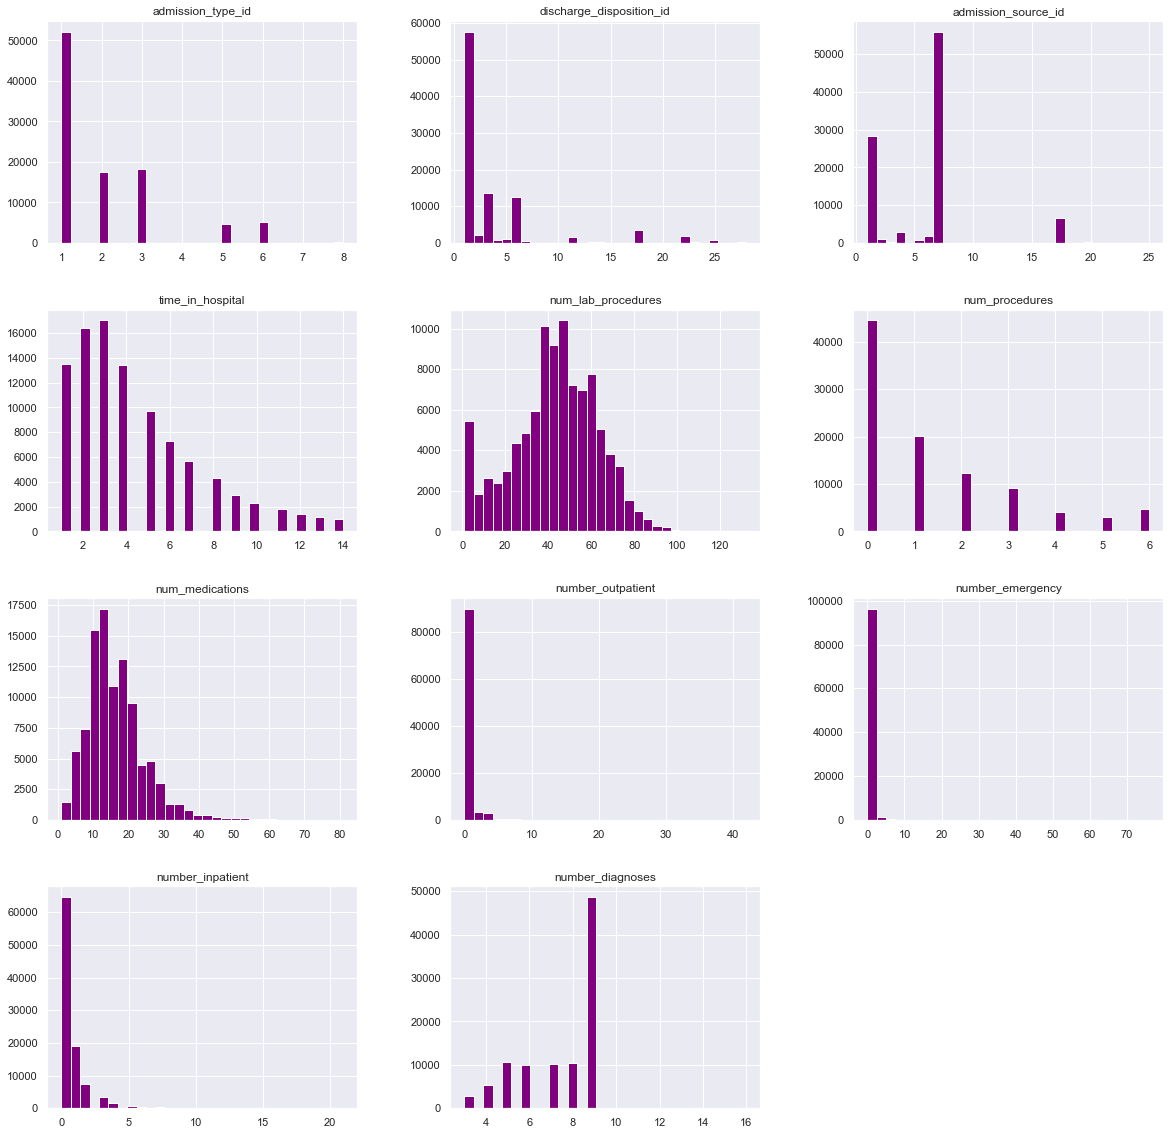

In [400]:
Y[numerical].hist(figsize=(20,20),bins=30,color="purple")

In [401]:
#Выведем пропущенные значения:
for col in Y.columns:
    if Y[col].dtype == object:
         print(col,Y[col][Y[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


Видно, что пропущенных значений не осталось.
##### Теперь поработаем с категориальными признаками

In [402]:
Y['age'].value_counts() 

[70-80)     25306
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [403]:
Y.loc[Y['age']== '[0-10)','age'] = 0;
Y.loc[Y['age']== '[10-20)','age'] = 1;
Y.loc[Y['age']== '[20-30)','age'] = 2;
Y.loc[Y['age']== '[30-40)','age'] = 3;
Y.loc[Y['age']== '[40-50)','age'] = 4;
Y.loc[Y['age']== '[50-60)','age'] = 5;
Y.loc[Y['age']== '[60-70)','age'] = 6;
Y.loc[Y['age']== '[70-80)','age'] = 7;
Y.loc[Y['age']== '[80-90)','age'] = 8;
Y.loc[Y['age']== '[90-100)','age'] = 9;
Y['age'] = Y['age'].astype(np.int32)


In [404]:
Y['age'].value_counts() 

7    25306
6    21809
8    16702
5    16697
4     9265
3     3548
9     2717
2     1478
1      466
0       65
Name: age, dtype: int64

In [405]:
Y['gender'].value_counts()  
Y.drop(Y[Y['gender'] =='Unknown/Invalid'].index, inplace=True)

In [406]:
Y.loc[Y['gender']== 'Female','gender'] = 0;
Y.loc[Y['gender']== 'Male','gender'] = 1;
Y['gender'].value_counts()  

0    52833
1    45219
Name: gender, dtype: int64

In [407]:
Y['race'].value_counts()

Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64

In [408]:
Y.loc[Y['race']== 'Caucasian','race'] = 0;
Y.loc[Y['race']== 'AfricanAmerican','race'] = 1;
Y.loc[Y['race']== 'Asian','race'] = 2;
Y.loc[Y['race']== 'Other','race'] = 4;
Y.loc[Y['race']== 'Hispanic','race'] = 3;

In [409]:
Y['race'].value_counts()

0    75079
1    18881
3     1984
4     1483
2      625
Name: race, dtype: int64

In [410]:
Y['max_glu_serum'].value_counts()  
#Порядковый параметр

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [411]:
 def glu(age):
    if age == '>300' :
        return 3
    elif age == '>200':
        return 2
    elif age == 'Norm':
        return 1
    else:
        return 0
      
Y['max_glu_serum'] = Y['max_glu_serum'].apply(glu)
Y['max_glu_serum'] = Y['max_glu_serum'].astype(np.int32)
Y['max_glu_serum'].value_counts()  

0    92844
1     2532
2     1449
3     1227
Name: max_glu_serum, dtype: int64

In [412]:
Y.loc[Y['race']== 'Caucasian','race'] = 0;
Y.loc[Y['race']== 'AfricanAmerican','race'] = 1;

In [413]:
 def A1(A1Cresult):
    if A1Cresult == '>8' :
        return 3
    elif A1Cresult == '>7':
        return 2
    elif A1Cresult == 'Norm':
        return 1
    else:
        return 0

Y['A1Cresult'] = Y['A1Cresult'].apply(A1)
Y['A1Cresult'] = Y['A1Cresult'].astype(np.int32)

In [414]:
Y['A1Cresult'].value_counts()  


0    81859
3     7631
1     4854
2     3708
Name: A1Cresult, dtype: int64

__Для рассмотрения категориальных признаков в виде диагноза необходимо ознакомиться с таблицей в которой обозначены группы болезни и их код.__  
* Ссылка : https://www.hindawi.com/journals/bmri/2014/781670/tab2/ 

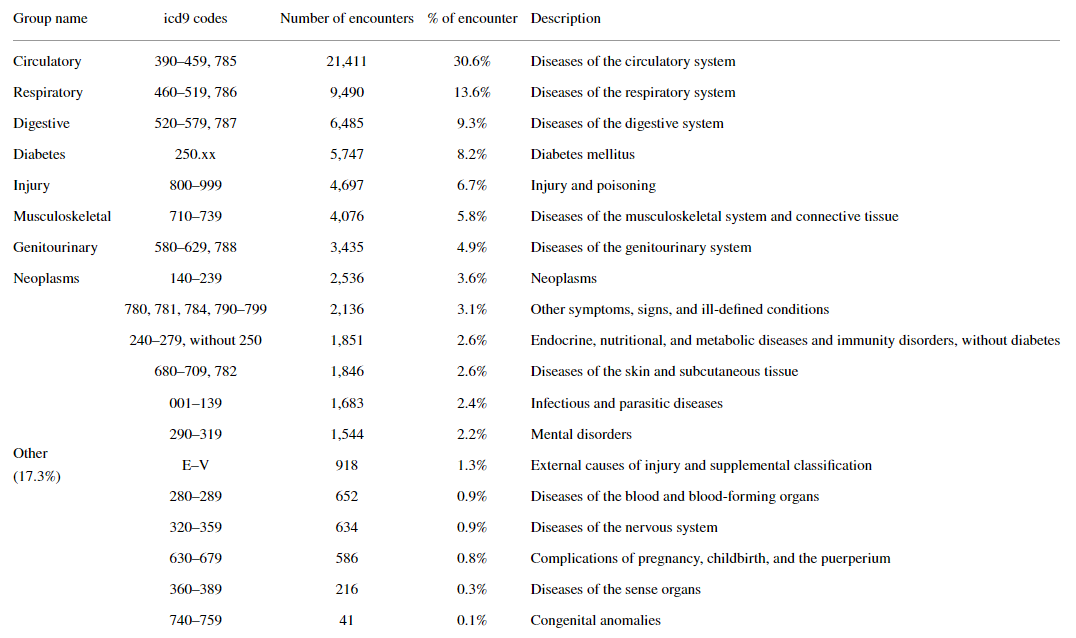

In [415]:
def disease(x):
    num=1
    if (str(x).find('V') != -1 or str(x).find('E') != -1):
        num = 1 #"other"
    elif(int(float(x)) in range(630, 680)):
        num =2 #"pregnat"
    elif(int(float(x)) in range(460, 520) or int(float(x)) == 786):
        num =3 #"respiratory"
    elif(int(float(x)) in range(800, 1000)):
        num =4 #"ingury"
    elif( int(float(x)) in range(520, 580) or int(float(x)) == 787):
        num = 5#"digestive"
    elif(int(float(x)) in range(710, 740)):
        num = 6#"musculoskeletal"
    elif(int(float(x)) == 250):
        num = 7#"diabetes"
    elif(int(float(x)) in range(580, 630) or int(float(x)) == 788):
        num = 8#"genitourinary"
    elif(int(float(x)) in range(140, 240)):
        num = 9#"neoplasms"        
    elif(int(float(x)) in range(390, 460) or int(float(x)) == 785):
        num = 10#"circulatori"   
    else:
        num = 11 #"other"
    return num

In [416]:
Y = Y[Y.diag_1  != '?']
Y['diag_1'].value_counts()

428    6730
414    6373
786    3900
410    3514
486    3412
       ... 
691       1
97        1
219       1
704       1
98        1
Name: diag_1, Length: 713, dtype: int64

In [417]:
Y['diag_1'] = Y['diag_1'].apply(disease)


In [418]:
Y['diag_1'].value_counts()  

10    29629
11    15295
3     13993
5      9187
7      7965
4      6703
8      4983
6      4739
9      3312
1      1601
2       645
Name: diag_1, dtype: int64

In [419]:
Y['diag_2'].value_counts()  

428     6517
276     6513
250     5412
427     4919
401     3613
        ... 
475        1
977        1
E883       1
955        1
123        1
Name: diag_2, Length: 740, dtype: int64

In [420]:
Y['diag_2'] = Y['diag_2'].apply(disease)

In [421]:
Y['diag_2'].value_counts()  

10    31103
11    22809
7     11862
3     10637
8      8203
5      4049
9      2493
1      2451
4      2328
6      1710
2       407
Name: diag_2, dtype: int64

In [422]:
Y['diag_3'].value_counts()  

250     11208
401      8089
276      5097
428      4491
427      3865
        ...  
V01         1
E861        1
385         1
657         1
193         1
Name: diag_3, Length: 786, dtype: int64

In [423]:
Y['diag_3'] = Y['diag_3'].apply(disease)

In [424]:
Y['diag_3'].value_counts()  

10    29631
11    23300
7     16695
3      7199
8      6527
1      4974
5      3852
4      1890
6      1862
9      1820
2       302
Name: diag_3, dtype: int64

In [425]:
Y['readmitted'].value_counts()


NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [426]:
Y['diabetesMed'].value_counts()

Yes    75350
No     22702
Name: diabetesMed, dtype: int64

In [427]:
Y.loc[Y['diabetesMed']== 'Yes','diabetesMed'] = 0;
Y.loc[Y['diabetesMed']== 'No','diabetesMed'] = 1;
Y['diabetesMed'].value_counts() 

0    75350
1    22702
Name: diabetesMed, dtype: int64

In [428]:
Y['change'].value_counts()

No    52774
Ch    45278
Name: change, dtype: int64

In [429]:
#Нашла эту функцию гугля ошибку)
Y['change'] = Y['change'].replace('Ch', 1)
Y['change'] = Y['change'].replace('No', 0)

In [430]:
Y['change'].value_counts()

0    52774
1    45278
Name: change, dtype: int64

На счет данных с таблеток взяла описание этого с сайта:
Для непатентованных названий: метформин, репаглинид, натеглинид, хлорпропамид, глимепирид, ацетогексамид, глипизид, глибурид, толбутамид, пиоглитазон, розиглитазон, акарбоза, миглитол, троглитазон, толазамид, экзаменид, ситаглиптин, инсулин, глибурид-метформин, глипизид-метформин, глимепирид -пиоглитазон, метформин-росиглитазон и метформин-пиоглитазон признак указывает на то, был ли назначен препарат или имело место изменение дозировки. Значения: «вверх», если доза была увеличена во время встречи, «вниз», если доза была уменьшена, «постоянно», если доза не изменилась, и «нет», если препарат не назначался.

In [431]:
name = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'citoglipton' ,'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide','examide']
for i in name:
    Y[i] = Y[i].replace("Up", 1)
    Y[i] = Y[i].replace("Steady", 1)
    Y[i] = Y[i].replace("Down", 1)
    Y[i] = Y[i].replace("No", 0)
    

In [432]:
Y[name]

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,citoglipton,rosiglitazone,...,glyburide-metformin,tolazamide,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,glipizide-metformin,troglitazone,tolbutamide,acetohexamide,examide
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101763,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101764,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Посмотрим на данные нашего Таргета:

In [ ]:
sns.countplot(x = "readmitted", data = Y)
plt.title("Distribution of Target Values")
plt.show()


In [ ]:
Y['readmitted'] = Y['readmitted'].replace('<30', 1)
Y['readmitted'] = Y['readmitted'].replace('>30', 2)
Y['readmitted'] = Y['readmitted'].replace('NO', 0)

In [434]:
Y[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98052 non-null  object
 1   gender                    98052 non-null  object
 2   age                       98052 non-null  int32 
 3   diag_1                    98052 non-null  int64 
 4   diag_2                    98052 non-null  int64 
 5   diag_3                    98052 non-null  int64 
 6   max_glu_serum             98052 non-null  int32 
 7   A1Cresult                 98052 non-null  int32 
 8   metformin                 98052 non-null  int64 
 9   repaglinide               98052 non-null  int64 
 10  nateglinide               98052 non-null  int64 
 11  chlorpropamide            98052 non-null  int64 
 12  glimepiride               98052 non-null  int64 
 13  acetohexamide             98052 non-null  int64 
 14  glipizide            

In [435]:
Y['examide']

1         0
2         0
3         0
4         0
5         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: examide, Length: 98052, dtype: int64

Производим нормализацию данных с помощью данной формулы.
$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - \mu_i}{\sigma_i}$$


In [436]:
data = Y[numerical]
Y[numerical] = (data - data.mean(axis = 0))/data.std(axis = 0)
Y[numerical]

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
1,-0.707391,-0.518588,0.300435,-0.475101,0.804167,-0.790595,0.231906,-0.293277,-0.214725,-0.508936,0.811966
2,-0.707391,-0.518588,0.300435,-0.809206,-1.630928,2.135992,-0.384731,1.265125,-0.214725,0.277830,-0.825167
3,-0.707391,-0.518588,0.300435,-0.809206,0.043199,-0.205278,-0.014749,-0.293277,-0.214725,-0.508936,-0.279456
4,-0.707391,-0.518588,0.300435,-1.143311,0.398318,-0.790595,-1.001368,-0.293277,-0.214725,-0.508936,-1.370878
5,-0.017793,-0.518588,-0.927574,-0.475101,-0.616305,2.721309,-0.014749,-0.293277,-0.214725,-0.508936,0.811966
...,...,...,...,...,...,...,...,...,...,...,...
101761,-0.707391,-0.141898,0.300435,-0.475101,0.398318,-0.790595,-0.014749,-0.293277,-0.214725,-0.508936,0.811966
101762,-0.707391,0.046447,-0.190769,0.193109,-0.514843,0.965357,0.231906,-0.293277,-0.214725,0.277830,0.811966
101763,-0.707391,-0.518588,0.300435,-1.143311,0.499780,-0.790595,-0.878041,0.485924,-0.214725,-0.508936,2.994810
101764,-0.017793,-0.141898,0.300435,1.863635,0.093931,0.380040,0.601889,-0.293277,-0.214725,0.277830,0.811966


In [445]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Y, test_size=0.3, random_state=42)

f = list(train_set.columns)
f = [f for f in features if f != target]
X_train = train_set[f]
y_train = train_set['readmitted']
X_test = test_set[f]
y_test = test_set['readmitted']

In [446]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

KNN

In [447]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [448]:
#Это я с прошлого года свои штучки вспомнила!Но благодаря Н.Р. Стронгиной я еще теперь знаю их смысл!
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')
    
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print_metrics(knn.predict(X_test), y_test)

R^2: -3.5695213726633375
MSE: 0.9483315202610825


RandomForestClassifier

In [449]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

In [450]:
err_train

1.4569613613846961e-05

In [451]:
err_test 

0.41841174870818604

In [459]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate

#gbr_grid_search = GridSearchCV(KNeighborsRegressor(), 
#                               [{'n_neighbors': [1, 2, 3, 4, 6, 8, 10]}],
#                               cv=5,
#                               error_score=make_scorer(mean_squared_error),
#                               verbose=10)


#gbr_grid_search.fit(X_train, y_train)


GBC

In [460]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.3818258639780873 0.41120478651074244


Вывод:
*RandomForestClassifier-Показал наилучшие результаты!В Юпитере вычисления происходили очень медленно!KNN посчитал относительно быстро.